# Keras Project

This notebook is modified from the official exercise in [Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/).

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd

In [3]:
data_info = pd.read_csv( '/content/gdrive/MyDrive/A_GoogleColab/1.1 TensorFlow_FILES/TensorFlow_FILES/DATA/lending_club_info.csv', index_col = 'LoanStatNew')

In [4]:
print( data_info.loc[ 'revol_util'][ 'Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [5]:
def feat_info( col_name):
  print( data_info.loc[ col_name][ 'Description'])

In [6]:
feat_info( 'mort_acc')

Number of mortgage accounts.


# Loading the data and other import

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
df_org = pd.read_csv( '/content/gdrive/MyDrive/A_GoogleColab/1.1 TensorFlow_FILES/TensorFlow_FILES/DATA/lending_club_loan_two.csv')
df = df_org

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Section 1: Exploratory Data Analysis

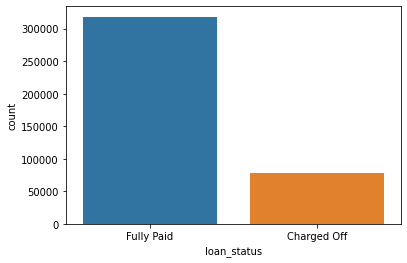

In [10]:
sns.countplot( x = 'loan_status', data = df)

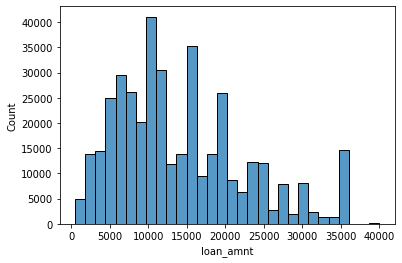

In [11]:
sns.histplot( x = 'loan_amnt', data = df, bins = 30)

In [12]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


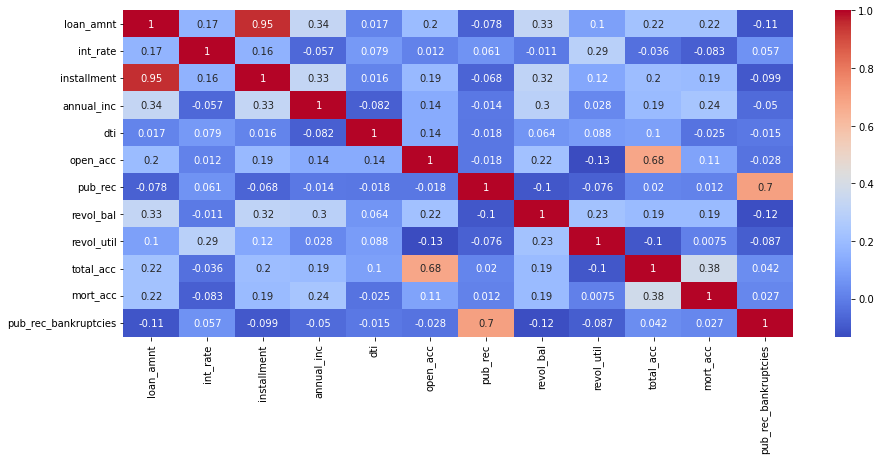

In [13]:
plt.figure( figsize = (15, 6))
sns.heatmap( df.corr(), annot = True, cmap = 'coolwarm')

Nearly perfect correlation is observed between loan amount and installment. Further investigation is required.

In [14]:
feat_info( 'installment')

The monthly payment owed by the borrower if the loan originates.


In [15]:
feat_info( 'loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


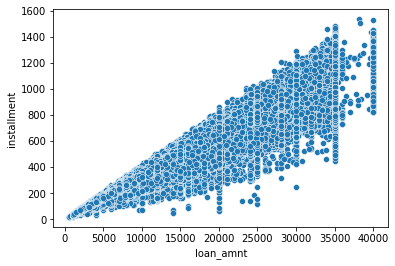

In [16]:
sns.scatterplot( x = 'loan_amnt', y = 'installment', data = df)

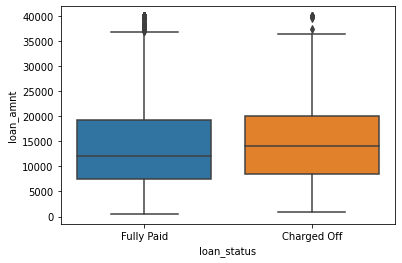

In [17]:
sns.boxplot( x = 'loan_status', y = 'loan_amnt', data = df)

In [18]:
df.groupby( 'loan_status')[ 'loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [19]:
sorted( df[ 'grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [20]:
sorted( df[ 'sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

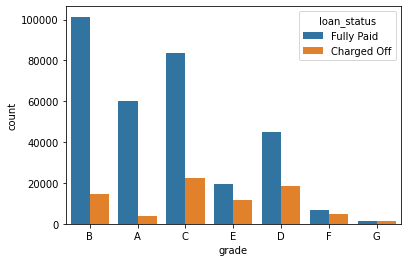

In [21]:
sns.countplot( x = 'grade', data = df, hue = 'loan_status')

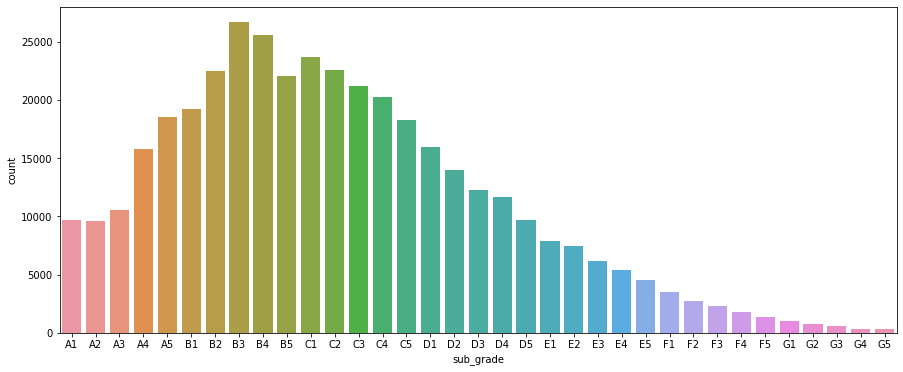

In [22]:
plt.figure( figsize = (15, 6))
order_ = sorted( df[ 'sub_grade'].unique())
sns.countplot( x = 'sub_grade', data = df, order = order_)

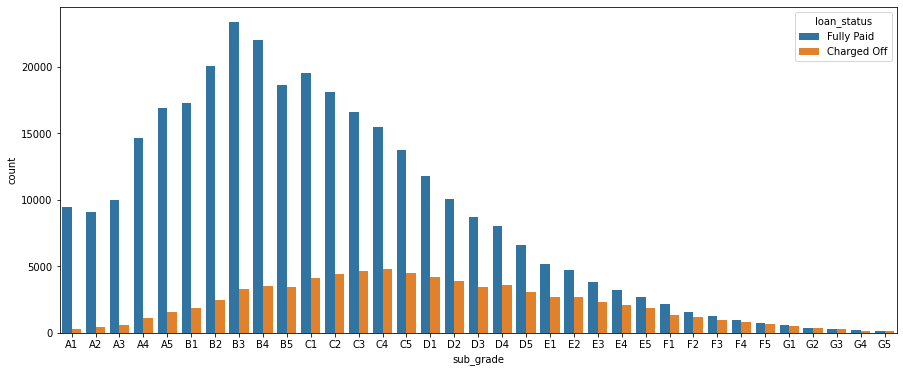

In [23]:
plt.figure( figsize = (15, 6))
order_ = sorted( df[ 'sub_grade'].unique())
sns.countplot( x = 'sub_grade', data = df, order = order_, hue = 'loan_status')

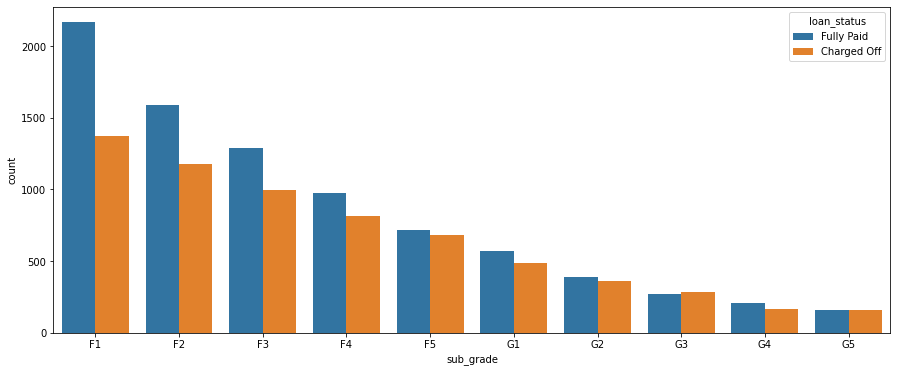

In [24]:
# To isolate F & G grade

f_n_g = df[ (df[ 'grade'] == 'F') | (df[ 'grade'] == 'G')]
plt.figure( figsize = (15, 6))
order_ = sorted( f_n_g[ 'sub_grade'].unique())
sns.countplot( x = 'sub_grade', data = f_n_g, order = order_, hue = 'loan_status')

In [25]:
df[ 'loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [26]:
df[ 'loan_repaid'] = df[ 'loan_status'].map( { 'Fully Paid': 1, 'Charged Off': 0})

In [27]:
df[ [ 'loan_status', 'loan_repaid']].head(10)

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
5,Fully Paid,1
6,Fully Paid,1
7,Fully Paid,1
8,Fully Paid,1
9,Fully Paid,1


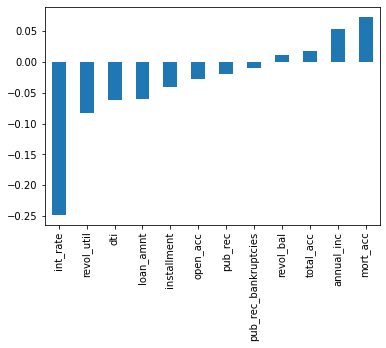

In [28]:
df.corr()[ 'loan_repaid'].drop( 'loan_repaid').sort_values().plot( kind = 'bar')

# Section 2: Data PreProcessing

In [29]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [30]:
# Missing Data

In [31]:
len( df)

396030

In [32]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [33]:
df.isnull().sum() / len( df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [34]:
print( feat_info( 'emp_title'))
print()
print( feat_info( 'emp_length'))

The job title supplied by the Borrower when applying for the loan.*
None

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
None


In [35]:
df[ 'emp_title'].nunique()

173105

In [36]:
df[ 'emp_title'].value_counts()

Teacher                          4389
Manager                          4250
Registered Nurse                 1856
RN                               1846
Supervisor                       1830
                                 ... 
Geo corporation                     1
Moore Capital Management, LP        1
cct 5                               1
Registered Nurse floor charge       1
LaCasa Grande                       1
Name: emp_title, Length: 173105, dtype: int64

In [37]:
# We can remove this variable as there are too many levels.

In [38]:
df = df.drop( 'emp_title', axis = 1)

In [39]:
df[ 'emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [40]:
# nan is there. dropna() is needed.

sorted( df[ 'emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [41]:
emp_length_order = [ '< 1 year',
                    '1 year',
                    '2 years',
                    '3 years',
                    '4 years',
                    '5 years',
                    '6 years',
                    '7 years',
                    '8 years',
                    '9 years',
                    '10+ years'
                    ]

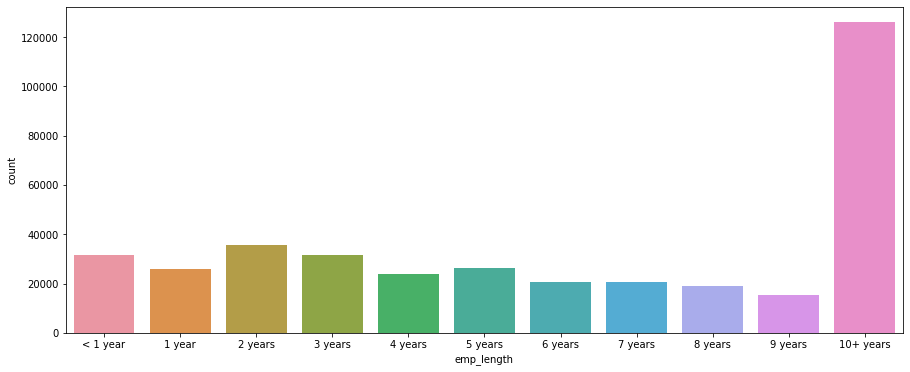

In [42]:
plt.figure( figsize = (15,6))
sns.countplot( x = 'emp_length', data = df, order = emp_length_order)

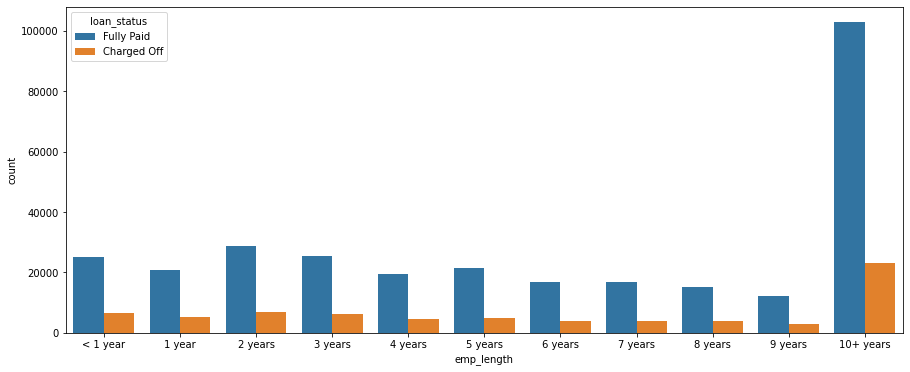

In [43]:
plt.figure( figsize = (15,6))
sns.countplot( x = 'emp_length', data = df, order = emp_length_order, hue = 'loan_status')

In [44]:
emp_co = df[ df[ 'loan_status'] == 'Charged Off'].groupby( 'emp_length').count()[ 'loan_status']

In [45]:
emp_fp = df[ df[ 'loan_status'] == 'Fully Paid'].groupby( 'emp_length').count()[ 'loan_status']

In [46]:
emp_len = emp_co / emp_fp

In [47]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

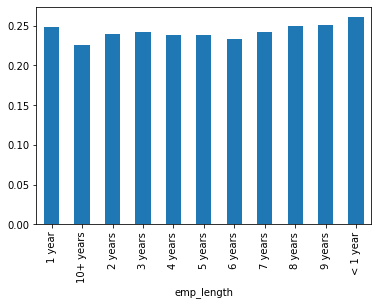

In [48]:
emp_len.plot( kind = 'bar')

In [49]:
# emp_length is not an useful information!
df = df.drop( 'emp_length', axis = 1)

In [50]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [51]:
df[ 'purpose'].head()

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

In [52]:
df[ 'title'].head()

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [53]:
# purpose and tite are the same. Can drop the title column
df = df.drop( 'title', axis = 1)

In [54]:
feat_info( 'mort_acc')

Number of mortgage accounts.


In [55]:
df[ 'mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [56]:
# Try to use linear model to fill missing data in mort_acc

In [57]:
print( 'Correlation with the mort_acc column')
df.corr()[ 'mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [58]:
print( 'Mean of mort_acc column per total_acc')
df.groupby( 'total_acc').mean()[ 'mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [59]:
total_acc_avg = df.groupby( 'total_acc').mean()[ 'mort_acc']

In [60]:
def fill_mort_acc( total_acc, mort_acc):
  if np.isnan( mort_acc):
    return total_acc_avg[ total_acc]
  else:
    return mort_acc

In [61]:
df[ 'mort_acc'] = df.apply( lambda x: fill_mort_acc(x[ 'total_acc'], x['mort_acc']), axis = 1)

In [62]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [63]:
# The missing data in revol_util and pub_rec_bankruptcies are too few
# Removing them with df.dropna() is fine.

In [64]:
df = df.dropna()
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [65]:
# To identify categorical variables

In [66]:
df.select_dtypes( ['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [67]:
df[ 'term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [68]:
# Conver df[ 'term'] into 36 or 60
df[ 'term'] = df[ 'term'].apply( lambda term: 36 if term == '36 months' else 60)

In [69]:
# Drop grade because sub_grade already store information of the grade
df = df.drop( 'grade', axis = 1)

In [70]:
subgrade_dummies = pd.get_dummies( df[ 'sub_grade'], drop_first = True)

In [71]:
df = pd.concat( [df.drop( ['sub_grade'], axis = 1), subgrade_dummies], axis = 1)

In [72]:
df.select_dtypes( ['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [73]:
df[ 'verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [74]:
df[ 'application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [75]:
df[ 'initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [76]:
df[ 'purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [77]:
# verification_status, application_type, initial_list_status, and purpose, can be tranformed into dummy variables.

In [78]:
dummies = pd.get_dummies( df[ [ 'verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first = True)

In [79]:
df = df.drop( [ 'verification_status', 'application_type', 'initial_list_status', 'purpose'], axis = 1)

In [80]:
df = pd.concat( [df, dummies], axis = 1)

In [81]:
df[ 'home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [82]:
# Replace NONE, ANY with OTHER
df[ 'home_ownership'] = df[ 'home_ownership'].replace( [ 'NONE', 'ANY'], 'OTHER')

In [83]:
home_dummy = pd.get_dummies( df[ 'home_ownership'], drop_first = True)
df = pd.concat( [df.drop( ['home_ownership'], axis = 1), home_dummy], axis = 1)

In [84]:
# Cannot convert address into zip code
#df = df.drop( ['address'], axis = 1)

df['zip_code'] = df['address'].apply(lambda address:address[-5:])

dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [85]:
df = df.drop( 'issue_d', axis = 1)
# To avoid data leakage

In [86]:
# df = df.drop( ['earliest_cr_line'], axis = 1)

df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [87]:
df.select_dtypes( ['object']).columns


Index(['loan_status'], dtype='object')

In [88]:
df = df.drop( 'loan_status', axis = 1)

# Train Test Split

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
#df = df.drop( 'loan_status', axis = 1)
df_sample = df.sample( frac = 1, random_state = 101)
print( 'Size of df = ', len( df))
print( 'Size of df_sample ', len( df_sample))

X = df_sample.drop( [ 'loan_repaid'], axis = 1).values
y = df_sample[ 'loan_repaid'].values

Size of df =  395219
Size of df_sample  395219


In [91]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.1)

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform( X_train)
X_test = scaler.transform( X_test)

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

In [94]:
X_train.shape

(355697, 78)

In [95]:
model = Sequential()

model.add( Dense( 78, activation = 'relu'))
model.add( Dropout( 0.2))

model.add( Dense( 39, activation = 'relu'))
model.add( Dropout( 0.2))

model.add( Dense( 20, activation = 'relu'))
model.add( Dropout( 0.2))

model.add( Dense( 1, activation = 'sigmoid'))

model.compile( loss = 'binary_crossentropy', optimizer = 'adam')

In [96]:
model.fit( X_train, y_train, epochs = 20, batch_size = 250, validation_data = (X_test, y_test))

Epoch 1/20
1423/1423 [==============================] - 7s 4ms/step - loss: 0.2947 - val_loss: 0.2630
Epoch 2/20
1423/1423 [==============================] - 6s 4ms/step - loss: 0.2658 - val_loss: 0.2613
Epoch 3/20
1423/1423 [==============================] - 6s 4ms/step - loss: 0.2636 - val_loss: 0.2606
Epoch 4/20
1423/1423 [==============================] - 6s 4ms/step - loss: 0.2622 - val_loss: 0.2601
Epoch 5/20
1423/1423 [==============================] - 6s 4ms/step - loss: 0.2617 - val_loss: 0.2601
Epoch 6/20
1423/1423 [==============================] - 6s 4ms/step - loss: 0.2610 - val_loss: 0.2596
Epoch 7/20
1423/1423 [==============================] - 6s 4ms/step - loss: 0.2607 - val_loss: 0.2594
Epoch 8/20
1423/1423 [==============================] - 5s 4ms/step - loss: 0.2602 - val_loss: 0.2596
Epoch 9/20
1423/1423 [==============================] - 5s 4ms/step - loss: 0.2600 - val_loss: 0.2591
Epoch 10/20
1423/1423 [==============================] - 6s 4ms/step - loss: 0.259

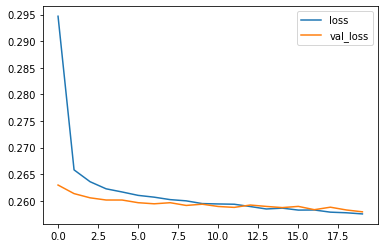

In [97]:
losses = pd.DataFrame( model.history.history)
losses[ [ 'loss', 'val_loss']].plot()

In [98]:
from sklearn.metrics import classification_report,confusion_matrix

In [99]:
predictions = ( model.predict( X_test) > 0.5).astype( 'int32')
# (model.predict( X_test) > 0.5).astype( 'int32') to replace model.predict_classes( X_test)

In [100]:
print( classification_report( y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61      7867
           1       0.88      1.00      0.93     31655

    accuracy                           0.89     39522
   macro avg       0.93      0.72      0.77     39522
weighted avg       0.90      0.89      0.87     39522



In [101]:
print( confusion_matrix( y_test, predictions))

[[ 3496  4371]
 [   86 31569]]


The model can predict loan repaid accurately.